# Disney Movies Analysis! 

## Content:
1. Data Wrangling
2. Data visualization


#### First import libraries & Load data

In [3]:
# import libraries
import numpy as np  # for arraies
import pandas as pd # for dataframes
import seaborn as sns # for visualization
import matplotlib.pyplot as plt # for visualization


In [4]:
# load data-set
db = pd.read_csv('disney_movies_total_gross.csv')

In [5]:
db

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,"Dec 21, 1937",Musical,G,"$184,925,485","$5,228,953,251"
1,Pinocchio,"Feb 9, 1940",Adventure,G,"$84,300,000","$2,188,229,052"
2,Fantasia,"Nov 13, 1940",Musical,G,"$83,320,000","$2,187,090,808"
3,Song of the South,"Nov 12, 1946",Adventure,G,"$65,000,000","$1,078,510,579"
4,Cinderella,"Feb 15, 1950",Drama,G,"$85,000,000","$920,608,730"
...,...,...,...,...,...,...
574,The Light Between Oceans,"Sep 2, 2016",Drama,PG-13,"$12,545,979","$12,545,979"
575,Queen of Katwe,"Sep 23, 2016",Drama,PG,"$8,874,389","$8,874,389"
576,Doctor Strange,"Nov 4, 2016",Adventure,PG-13,"$232,532,923","$232,532,923"
577,Moana,"Nov 23, 2016",Adventure,PG,"$246,082,029","$246,082,029"


# Data Wrangling

#### Know information about data

In [6]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   movie_title               579 non-null    object
 1   release_date              579 non-null    object
 2   genre                     562 non-null    object
 3   MPAA_rating               523 non-null    object
 4   total_gross               579 non-null    object
 5   inflation_adjusted_gross  579 non-null    object
dtypes: object(6)
memory usage: 27.3+ KB


In [7]:
db.describe().T

,count,unique,top,freq
movie_title,579,573,The Jungle Book,3
release_date,579,553,"Dec 25, 1997",3
genre,562,12,Comedy,182
MPAA_rating,523,5,PG,187
total_gross,579,576,$0,4
inflation_adjusted_gross,579,576,$0,4


#### How many duplicats in the data


In [8]:
db.nunique()

movie_title                 573
release_date                553
genre                        12
MPAA_rating                   5
total_gross                 576
inflation_adjusted_gross    576
dtype: int64

In [9]:
db.duplicated().sum()

0

### Now we can see that we should convert datatype of each attribute to can process it easier


#### Convert "release_date" from Object to Date

In [10]:
db['release_date'] = pd.to_datetime(db['release_date'])

In [11]:
db['release_date']

0     1937-12-21
1     1940-02-09
2     1940-11-13
3     1946-11-12
4     1950-02-15
         ...    
574   2016-09-02
575   2016-09-23
576   2016-11-04
577   2016-11-23
578   2016-12-16
Name: release_date, Length: 579, dtype: datetime64[ns]

#### Convert "total_gross" & "inflation_adjusted_gross" from Object to int

In [12]:
db['total_gross'] = db['total_gross'].str.strip('$')
db['total_gross'] = db['total_gross'].str.replace(',', '').astype('int')

In [13]:
db['inflation_adjusted_gross'] = db['inflation_adjusted_gross'].str.strip('$')
db['inflation_adjusted_gross'] = db['inflation_adjusted_gross'].str.replace(',', '').astype('int64')

In [14]:
db['total_gross']

0      184925485
1       84300000
2       83320000
3       65000000
4       85000000
         ...    
574     12545979
575      8874389
576    232532923
577    246082029
578    529483936
Name: total_gross, Length: 579, dtype: int32

In [15]:
db['inflation_adjusted_gross']

0      5228953251
1      2188229052
2      2187090808
3      1078510579
4       920608730
          ...    
574      12545979
575       8874389
576     232532923
577     246082029
578     529483936
Name: inflation_adjusted_gross, Length: 579, dtype: int64

#### Convert 'MPAA_rating' from object to categorical data

In [16]:
# there are null values?
db['MPAA_rating'].isnull().sum()


56

In [17]:
# frequancy of each value  
db['MPAA_rating'].value_counts()


PG           187
PG-13        145
R            102
G             86
Not Rated      3
Name: MPAA_rating, dtype: int64

- **PG:** Parental Guidance Suggested – Some material may not be suitable for children.
- **PG-13:** Parents Strongly Cautioned – Some material may be inappropriate for children under 13.
- **R:** Restricted – Under 17 requires accompanying parent or adult guardian
- **G:** General audiences – All ages admitted.
#### after we know  the meaning of each rate, we can fill nulls with the mode

In [18]:
db['MPAA_rating'].mode()

0    PG
dtype: object

In [19]:
db['MPAA_rating'] =db['MPAA_rating'].fillna('PG')

In [20]:
db['MPAA_rating'].isnull().sum()


0

#### Now we can convert it to categorical

In [21]:
db['MPAA_rating'] = db['MPAA_rating'].astype('category')

####  Drop NULLS

In [22]:
db.isnull().sum()


movie_title                  0
release_date                 0
genre                       17
MPAA_rating                  0
total_gross                  0
inflation_adjusted_gross     0
dtype: int64

In [23]:
db = db.dropna()

In [24]:
db['genre'].isnull().sum()

0

#### Check our datatypes..

In [25]:
db.dtypes

movie_title                         object
release_date                datetime64[ns]
genre                               object
MPAA_rating                       category
total_gross                          int32
inflation_adjusted_gross             int64
dtype: object

 #### Now we can  visualize Data, Let's GO!! 

# Data visualization

#### Most released type of movies

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

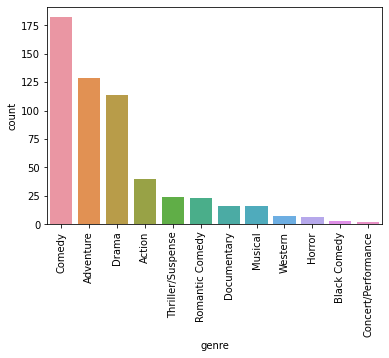

In [31]:
sns.countplot(x="genre",data=db,order = db['genre'].value_counts().index)
plt.xticks(rotation=90)

#### Most movie rate

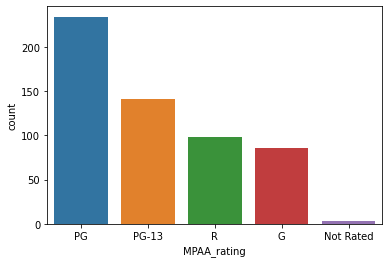

In [56]:
sns.countplot(x=db['MPAA_rating'],order = db['MPAA_rating'].value_counts().index)
plt.show()

#### Gross over Years

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

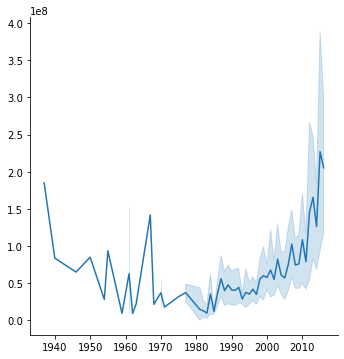

In [63]:

sns.relplot(x=db['release_date'].dt.year,y="total_gross",
data=db,kind="line")
plt.show()

#### Top ten movies at the box office

##### The most month in which a movie is released

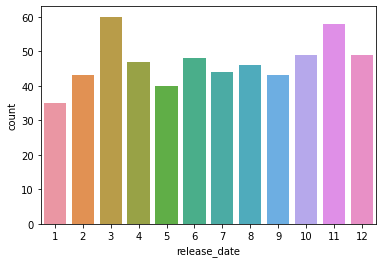

In [68]:
sns.countplot(x= db['release_date'].dt.month)
plt.show()

#### Top ten movies at the box office

In [73]:
db.sort_values(by='total_gross', ascending=False).head(10)

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
564,Star Wars Ep. VII: The Force Awakens,2015-12-18,Adventure,PG-13,936662225,936662225
524,The Avengers,2012-05-04,Action,PG-13,623279547,660081224
578,Rogue One: A Star Wars Story,2016-12-16,Adventure,PG-13,529483936,529483936
571,Finding Dory,2016-06-17,Adventure,PG,486295561,486295561
558,Avengers: Age of Ultron,2015-05-01,Action,PG-13,459005868,459005868
441,Pirates of the Caribbean: Dead Man’…,2006-07-07,Adventure,PG-13,423315812,544817142
179,The Lion King,1994-06-15,Adventure,G,422780140,761640898
499,Toy Story 3,2010-06-18,Adventure,G,415004880,443408255
532,Iron Man 3,2013-05-03,Action,PG-13,408992272,424084233
569,Captain America: Civil War,2016-05-06,Action,PG-13,408084349,408084349


#### Movie genre trend

In [78]:
db.groupby('genre').total_gross.sum().sort_values(ascending=False)


genre
Adventure              1.638907e+10
Comedy                 8.119620e+09
Action                 4.184563e+09
Drama                  4.106973e+09
Thriller/Suspense      1.406807e+09
Musical                1.157284e+09
Romantic Comedy        1.152207e+09
Western                3.590115e+08
Documentary            1.806856e+08
Concert/Performance    1.034565e+08
Black Comedy           9.754321e+07
Horror                 8.706887e+07
Name: total_gross, dtype: float64

 #### So.. Disney should make more action and adventure movies